In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f6e7b3ad3addac5f245402c00364c74


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | halalo
City not found. Skipping...
Processing Record 5 of Set 1 | goksun
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | dubbo
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | ayia galini
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | comodoro rivadavia
Processing Record 17 of Set 1 | roebourne
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | upernavik
Pr

Processing Record 38 of Set 4 | gulshat
City not found. Skipping...
Processing Record 39 of Set 4 | road town
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | pestravka
Processing Record 42 of Set 4 | kamaishi
Processing Record 43 of Set 4 | malwan
City not found. Skipping...
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | rudnichnyy
Processing Record 46 of Set 4 | butajira
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | port-gentil
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | shingu
Processing Record 1 of Set 5 | pizarro
Processing Record 2 of Set 5 | mobaye
Processing Record 3 of Set 5 | port keats
Processing Record 4 of Set 5 | sakakah
Processing Record 5 of Set 5 | teya
Processing Record 6 of Set 5 | basoko
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | quatre cocos
Processing Record 9 of Set 5 | salalah
Processing Record 10 of Set 5 | okhotsk


Processing Record 29 of Set 8 | santiago
Processing Record 30 of Set 8 | daoukro
Processing Record 31 of Set 8 | mollendo
Processing Record 32 of Set 8 | jardim
Processing Record 33 of Set 8 | odweyne
Processing Record 34 of Set 8 | kazachinskoye
Processing Record 35 of Set 8 | ankang
Processing Record 36 of Set 8 | pundaguitan
Processing Record 37 of Set 8 | andapa
Processing Record 38 of Set 8 | qaqortoq
Processing Record 39 of Set 8 | kovdor
Processing Record 40 of Set 8 | tsumeb
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | fort saint james
Processing Record 43 of Set 8 | dole
Processing Record 44 of Set 8 | rorvik
Processing Record 45 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 46 of Set 8 | sangar
Processing Record 47 of Set 8 | aswan
Processing Record 48 of Set 8 | marcona
City not found. Skipping...
Processing Record 49 of Set 8 | miraflores
Processing Record 50 of Set 8 | mentok
City not found. Skipping...
Processing Record 1 of 

Processing Record 11 of Set 12 | otane
Processing Record 12 of Set 12 | cochrane
Processing Record 13 of Set 12 | scarborough
Processing Record 14 of Set 12 | dingle
Processing Record 15 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 16 of Set 12 | borogontsy
Processing Record 17 of Set 12 | acarau
Processing Record 18 of Set 12 | saint-augustin
Processing Record 19 of Set 12 | aksarka
Processing Record 20 of Set 12 | itarema
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | tual
Processing Record 23 of Set 12 | itaituba
Processing Record 24 of Set 12 | galle
Processing Record 25 of Set 12 | dattapur
Processing Record 26 of Set 12 | phatthalung
Processing Record 27 of Set 12 | gravelbourg
Processing Record 28 of Set 12 | toora-khem
Processing Record 29 of Set 12 | jabiru
City not found. Skipping...
Processing Record 30 of Set 12 | morondava
Processing Record 31 of Set 12 | pavelets
Processing Record 32 of Set 12 | kalmunai
Processing Record 

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,79.41,69,20,17.27,BB,2022-04-14 03:23:21
1,Nikolskoye,59.7035,30.7861,34.81,91,92,2.93,RU,2022-04-14 03:18:35
2,New Norfolk,-42.7826,147.0587,65.91,49,100,3.00,AU,2022-04-14 03:23:21
3,Goksun,38.0210,36.4973,31.42,54,0,6.80,TR,2022-04-14 03:23:22
4,Ostrovnoy,68.0531,39.5131,12.27,96,91,7.16,RU,2022-04-14 03:23:23
5,Hamilton,39.1834,-84.5333,61.63,95,100,8.05,US,2022-04-14 03:23:08
6,Ribeira Grande,38.5167,-28.7000,59.20,65,0,12.62,PT,2022-04-14 03:23:23
7,Dubbo,-32.2500,148.6167,75.33,43,40,12.66,AU,2022-04-14 03:20:27
8,Bluff,-46.6000,168.3333,59.81,77,75,20.27,NZ,2022-04-14 03:23:23
9,Klaksvik,62.2266,-6.5890,41.92,86,58,17.49,FO,2022-04-14 03:20:40


In [39]:
new_column_order = ["column2", "column4, "column5", "column7", "column8", "column9", "column6",V "column3", "column10"]

SyntaxError: invalid syntax (<ipython-input-39-edcf5da2c548>, line 1)

In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

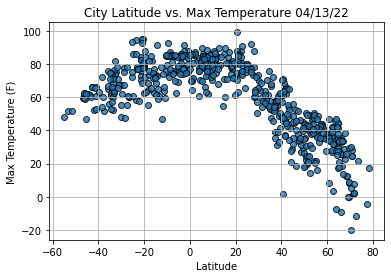

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

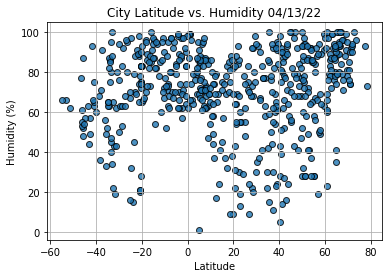

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

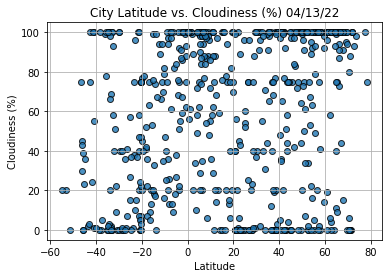

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

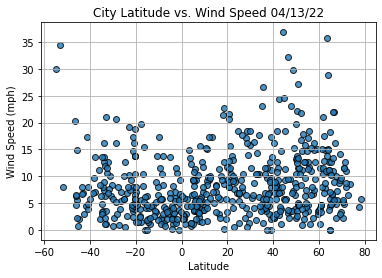

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City           Comodoro Rivadavia
Lat                      -45.8667
Lng                         -67.5
Max Temp                    62.46
Humidity                       48
Cloudiness                      0
Wind Speed                  14.97
Country                        AR
Date          2022-04-14 03:21:48
Name: 13, dtype: object

In [36]:
city_data_df['Lat'] >=0

0       True
1       True
2      False
3       True
4       True
       ...  
562     True
563     True
564     True
565     True
566     True
Name: Lat, Length: 567, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,79.41,69,20,17.27,BB,2022-04-14 03:23:21
1,Nikolskoye,59.7035,30.7861,34.81,91,92,2.93,RU,2022-04-14 03:18:35
3,Goksun,38.0210,36.4973,31.42,54,0,6.80,TR,2022-04-14 03:23:22
4,Ostrovnoy,68.0531,39.5131,12.27,96,91,7.16,RU,2022-04-14 03:23:23
5,Hamilton,39.1834,-84.5333,61.63,95,100,8.05,US,2022-04-14 03:23:08


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

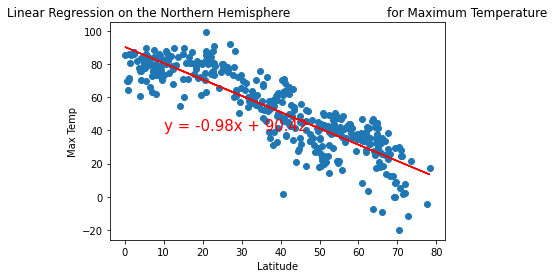

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

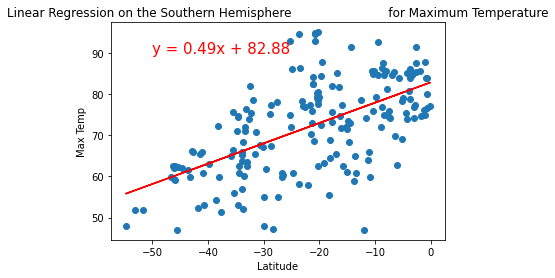

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

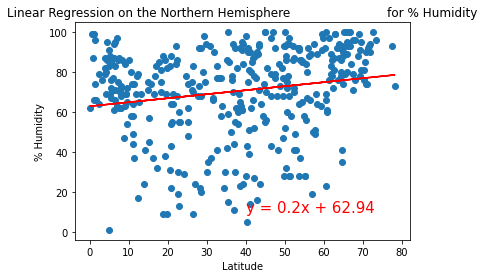

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

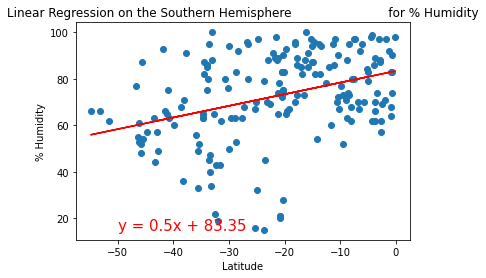

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

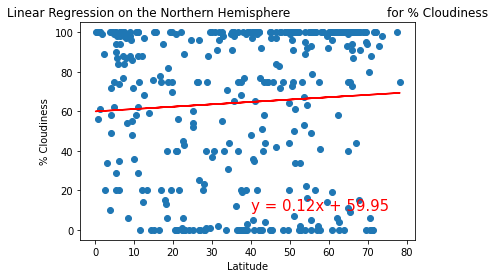

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

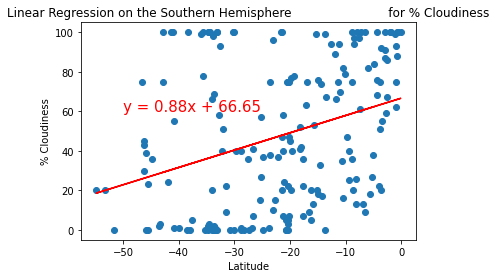

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

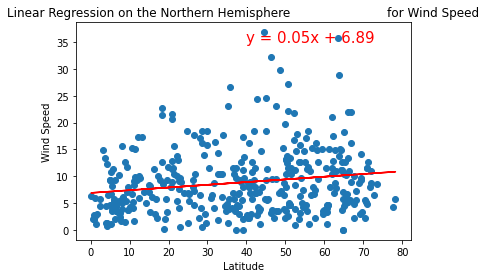

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

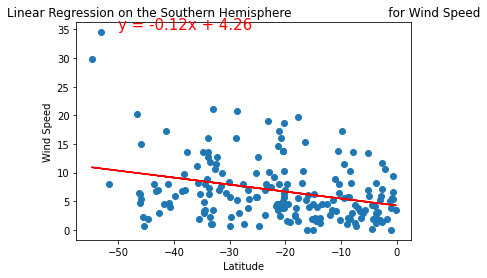

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))